<a href="https://colab.research.google.com/github/Roshan4151/-EDA-on-Airbnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_(Individual)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
#Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
#Mounting the drive on google collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#CSV file for data analysis
working_path='/content/drive/MyDrive/EDA /Airbnb NYC 2019.csv'
df = pd.read_csv(working_path)

In [ ]:
# Checking how our DataFrame looks 
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Checking the shape of DataFrame
df.shape

(48895, 16)

In [ ]:
#Checking the basic information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**In this data set there are NULL values in 'name','host_name','last_review','reviews_per_month'**

In [ ]:
# Now we will count the NULL values of above mentioned columns
null_values = ['name','host_name','last_review','reviews_per_month']
df[null_values].isnull().sum()

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64

In [ ]:
# Now we fill null values in columns 'name','host_name' with 'Not Given','Not Present' respectively
df['name'].fillna('Not Given',inplace=True)
df['host_name'].fillna('Not Present',inplace=True)
df['reviews_per_month'].fillna(0.00,inplace=True)

In [ ]:
# Now we will drop the 'last_review' column,which is not usefull for our analysis
df.drop('last_review',axis=1,inplace=True)

In [ ]:
# Now check there is any null value present in our DataFrame
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**Now you can see that,there is no Null value present in our DataFrame.**

# **Now we will start our Data Analysis**



##   1) What can we learn about different hosts and areas?




In [ ]:
df1 = df.groupby(['host_name','neighbourhood_group'])
df1

In [ ]:
df1 = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].count().reset_index()
df2 = df1.sort_values('calculated_host_listings_count',ascending = False)
area_counts = df2.head(12)
area_counts

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,230
9742,Michael,Manhattan,212
3250,David,Manhattan,202
9741,Michael,Brooklyn,159
6808,John,Manhattan,151
3249,David,Brooklyn,142
7275,Kara,Manhattan,135
9856,Mike,Manhattan,134
432,Alex,Manhattan,134


Text(0, 0.5, 'calculated_host_listings_count')

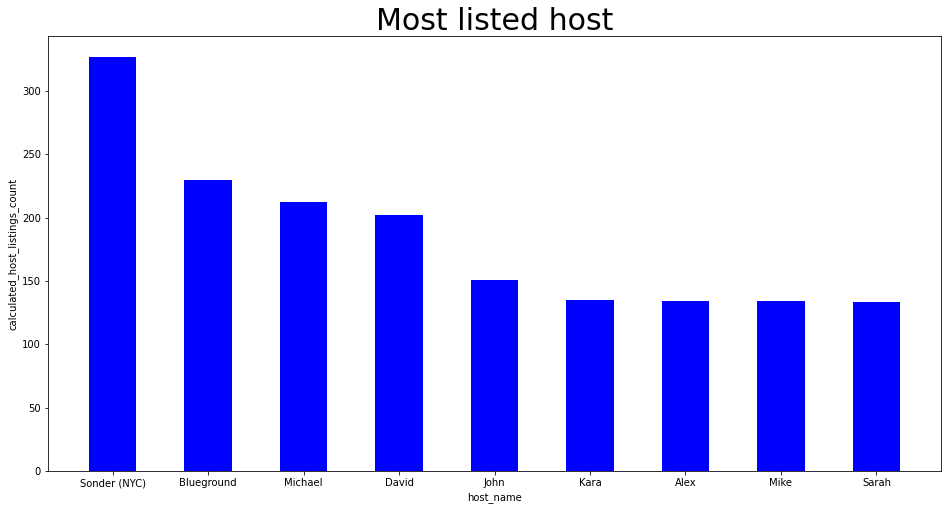

In [ ]:
# Data visualization (bars)
plt.rcParams['figure.figsize'] = (16, 8)
plt.bar(area_counts['host_name'],area_counts['calculated_host_listings_count'],color = 'blue',width = .5)
plt.title('Most listed host',{'fontsize':30})
plt.xlabel('host_name')
plt.ylabel('calculated_host_listings_count')

## From the above bar chart we have observed that,most number of listings from Manhattan by host name Sonder (NYC) followed by Blueground and Michael.



##   2) What can we learn from predictions? (ex: locations, prices, reviews, etc)



In [ ]:
most_demanded_location =df.groupby('neighbourhood_group')['neighbourhood_group'].count()
most_demanded_location

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood_group, dtype: int64

## From the above analysis we are clearly seen that the most demaded location is Manhattan followed by Brooklyn.

In [ ]:
prices_room_type =df.groupby('room_type').agg({'price':['max','mean'],'id':'count'}).reset_index()

In [ ]:
prices_room_type

room_type  price                 id
                      max        mean  count
0  Entire home/apt  10000  211.794246  25409
1     Private room  10000   89.780973  22326
2      Shared room   1800   70.127586   1160

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


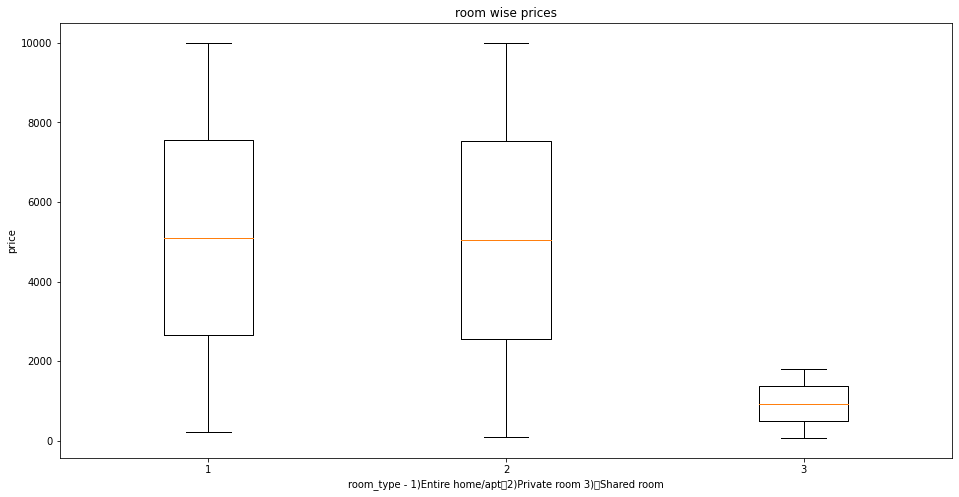

In [ ]:
# Data visualization (boxplot)
plt.boxplot(prices_room_type['price'])
plt.title('room wise prices')
plt.xlabel('room_type - 1)Entire home/apt	2)Private room 3)	Shared room')
plt.ylabel('price')
plt.show()

# The entire home and private rooms has the maximum demand.

# 3) Which hosts are the busiest and why?

In [ ]:
df3 = df.groupby(['host_name','room_type'])['minimum_nights'].count().reset_index()
df4 = df3.sort_values('minimum_nights',ascending = False)

In [ ]:
df5=df4.head(8)
df5

,host_name,room_type,minimum_nights
12508,Sonder (NYC),Entire home/apt,319
9171,Michael,Entire home/apt,251
1744,Blueground,Entire home/apt,232
3084,David,Entire home/apt,214
3085,David,Private room,184
413,Alex,Entire home/apt,175
6415,John,Private room,153
9172,Michael,Private room,152


Text(0, 0.5, 'minimum night stay')

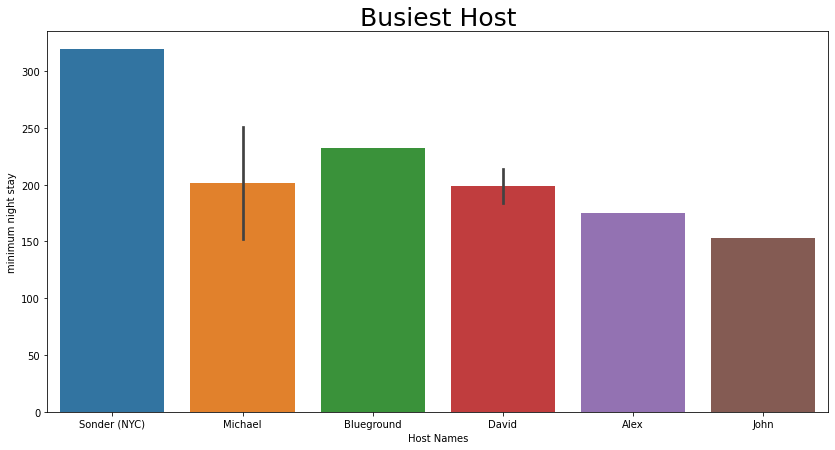

In [ ]:
# Data Visualization(barplot)
plt.rcParams['figure.figsize'] = (14,7)
z = sns.barplot(x = df5['host_name'],y = df5['minimum_nights'])
z.set_title('Busiest Host',{'fontsize':25})
z.set_xlabel('Host Names')
z.set_ylabel('minimum night stay')

# Busiest hosts are:
1.   Sonder (NYC)
2.   Michael
3.   Blueground



Because these hosts listed room type as Entire home and Private room which is preferred by most number of people and they are providing the rooms in the preferred locations .

# 4) Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
#Now we are performing groupby operations
df6 = df.groupby(['neighbourhood_group','room_type']).agg({'minimum_nights':'count'}).reset_index()

In [ ]:
traffic_areas = df6.sort_values('minimum_nights',ascending = False)

In [ ]:
high_traffic_areas=traffic_areas.head()
high_traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372


In [ ]:
Low_traffic_areas=traffic_areas.tail()
Low_traffic_areas

,neighbourhood_group,room_type,minimum_nights
11,Queens,Shared room,198
13,Staten Island,Private room,188
12,Staten Island,Entire home/apt,176
2,Bronx,Shared room,60
14,Staten Island,Shared room,9


##We can see the most traffic is in  Manhattan and Brooklyn and the less number of traffic is in staten island .we know that brooklyn has to so many places to visit and have more number of rooms.


#5) How many properties are availabel for more thn 100 days?


In [ ]:
#getting the values where availabilities of room are  more than 100 days
often_availabel = df[df['availability_365'] >= 100]

In [ ]:
often_availabel['availability_365'].count()

19162

In [ ]:
#calculating the percentage 
percent_availabel_more =often_availabel['availability_365'].count()/df['availability_365'].count()*100

In [ ]:
percent_availabel_more.round(2)

39.19

### **Here,39.19% of properties are availabel for more than 100 days.Most of the properties doesn't work for full year.** 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

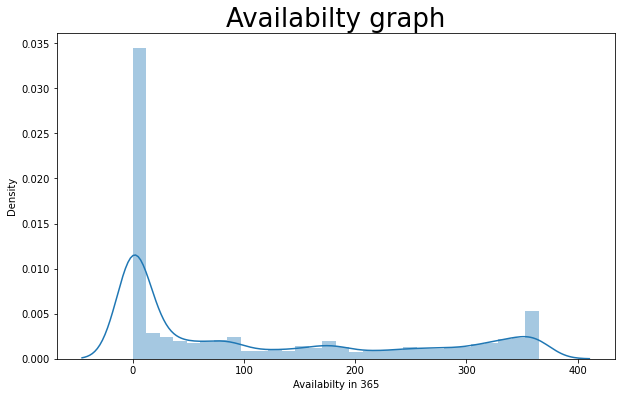

In [ ]:
# Data visualization(displot)
a=sns.distplot(df['availability_365'])
a.set_title('Availabilty graph',{'fontsize':26})
a.set_xlabel('Availabilty in 365')
a.set_ylabel('Density')

# 6) check how the average price varies for different room types?

In [ ]:
# Writing code for average prices
df7=df.groupby(['room_type'])['price'].mean().reset_index()
df7.head()

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


Text(0, 0.5, 'Average price')

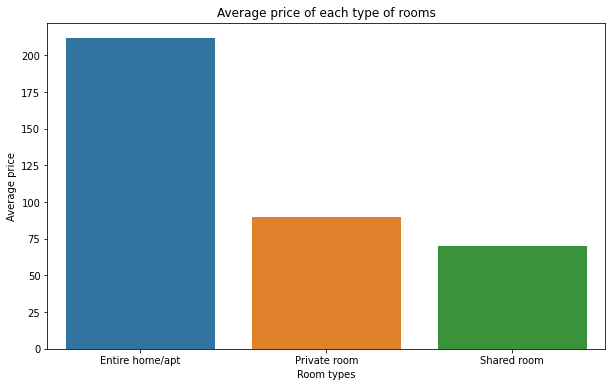

In [ ]:
# Data visualization (bars)
plt.rcParams['figure.figsize']=(10,6)
sns.barplot(data=df7,x='room_type',y='price')
plt.title('Average price of each type of rooms')
plt.xlabel('Room types')
plt.ylabel('Average price')

## The above barplot clearly showsing that the average price for entire home/apt is the highest and shared rooms have the lowest average price.

## 7) <u>Which neighbourhood group has highest number of Airbnb?

In [ ]:
# So as we know that,all airbnb have different id so we can check with that
df8 = df.groupby('neighbourhood_group')['id'].count().reset_index()

In [ ]:
# There id is the number of Airbnb 
df8.sort_values('id',ascending = False)

,neighbourhood_group,id
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


Text(0, 0.5, 'number of airbnb')

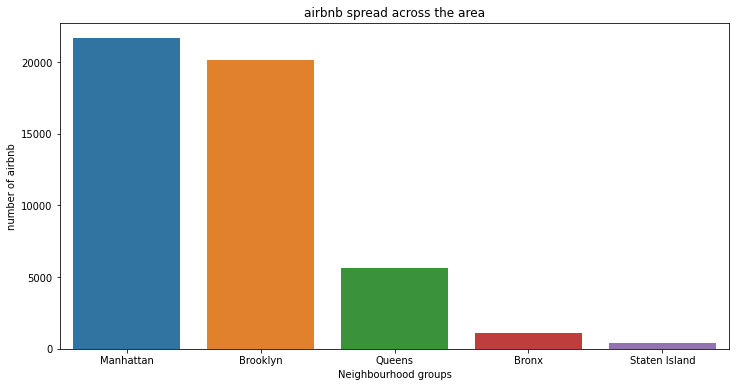

In [ ]:
#Lets check which place has the most number of Airbnb
plt.rcParams['figure.figsize']=(12,6)
df_5=df['neighbourhood_group'].value_counts().reset_index().rename(columns={'index':'neighbourhood_group','neighbourhood_group':'count'})
sns.barplot(data=df_5,x='neighbourhood_group',y='count')
plt.title('airbnb spread across the area')
plt.xlabel('Neighbourhood groups')
plt.ylabel('number of airbnb')

**So here,we can see tht manhattan has the most number of airbnb after then brooklyn has the second place.**

#  **Summary** -
This Airbnb ('AB_NYC_2019') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented.At the beginning we did some data cleaning,which included replacing null values and replacing some values which seems to be wrong.Then we took insights from the data as follows.First, we have found hosts that take good advantage of the Airbnb platform and provide the most listings. We found that our top host has 327 listings.After that, we proceeded with analyzing how prices differed with different room types and in different neighbourhood groups. We also analyzed which type of rooms did people preffered the most to stay, and found out that people preffered mostly entire houses. Next, we put good use of our latitude and longitude columns and used to create a graph color-coded by the neighbourhood groups and shape coded by their availability.And we also checked which rooms are available more than 100 days.We even checked about how each column were co related with one another.Overall, we discovered a very good number of interesting relationships between features and explained each step of the process.





# Conclusion -

1. Most number of listings from Manhattan by host name Sonder (NYC) and then Blueground and Michael.
2. The entire home and private rooms has the maximum demand.And minimum demand for shared rooms.
3. Brooklyn has the second-highest number of listings and is the second most expensive group for rentals.
4. Sonder(NYC)is the most bussiest host and then Michael.Because these hosts listed room type as Entire home and Private room which is preferred by most number of people.
5. There are only 39.19% of properties are availabel for more than 100 days.
6. The most expensive room types are the Entire home and then private rooms.